# Data Overview & Cleaning

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('Data(Task-2)/newsData/raw_analyst_ratings.csv')

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'url'])

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Basic info
print(df.info())
# Drop rows with missing date
df_time = df.dropna(subset=['date']).copy()
print(df_time.shape)  # should be ~55,987 rows
# Basic info
print(df.info())

headline           0
publisher          0
date         1351341
stock              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype                    
---  ------     --------------    -----                    
 0   headline   1407328 non-null  object                   
 1   publisher  1407328 non-null  object                   
 2   date       55987 non-null    datetime64[ns, UTC-04:00]
 3   stock      1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), object(3)
memory usage: 42.9+ MB
None
(55987, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype                    
---  ------     --------------    -----                    
 0   headline   1407328 non-null  object                   
 1   publisher  1407328 non-null  object            

Key Takeaways – Data Cleaning & Overview

- The dataset originally contained 1,407,328 rows, but a large portion (~1,351,341 rows) were missing the publication date.

- Since the date is essential for time series analysis, these rows were removed, leaving 55,987 rows with valid dates.

- All rows still have headlines, publishers, and stock symbols, so they can be used for textual and

# Descriptive Statistics

In [3]:
# Headline length
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

# Most active publishers
publisher_counts = df['publisher'].value_counts().head(10)
print(publisher_counts)

# Number of unique stocks
print(f"Unique stocks: {df['stock'].nunique()}")


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64
Unique stocks: 6204


 Key Takeaways (Task 1 – Descriptive EDA)

- The dataset contains 1.4M financial news headlines from multiple publishers.

- Many rows were missing date information, so we removed these rows for time-series analysis (≈55K rows left with valid timestamps).

- Headlines are generally short (median 64 characters) but vary significantly in length.

- A small set of publishers dominates the dataset — mainly Benzinga contributors.

- The dataset covers over 6,200 unique stocks, showing broad market coverage.

# Publisher Analysis

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


C:\Users\bezis\AppData\Local\Temp\ipykernel_7796\3922339464.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index, palette="viridis")


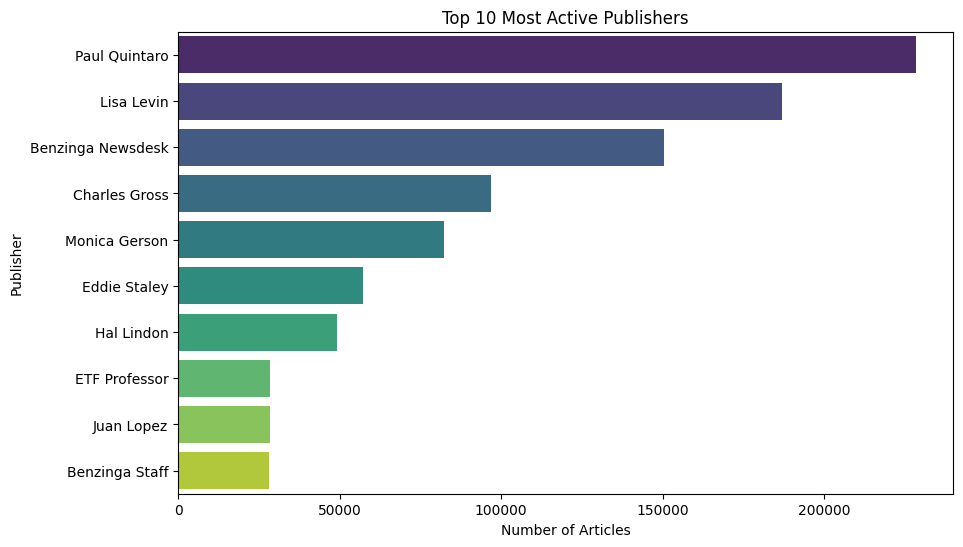

In [4]:
# Count of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))

# Optional: Plot top publishers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index, palette="viridis")
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


 key takeaways in a concise form:

- Few publishers dominate: Paul Quintaro and Lisa Levin produce the majority of articles.

- Content skew: News coverage is heavily influenced by top contributors.

- Medium vs niche contributors: Some publishers provide steady coverage; others contribute specialized or niche content.

- Insight for analysis: Top publishers reflect mainstream trends, while low-volume contributors may highlight niche or unique news.

# Publication Date Analysis (Time Trends)

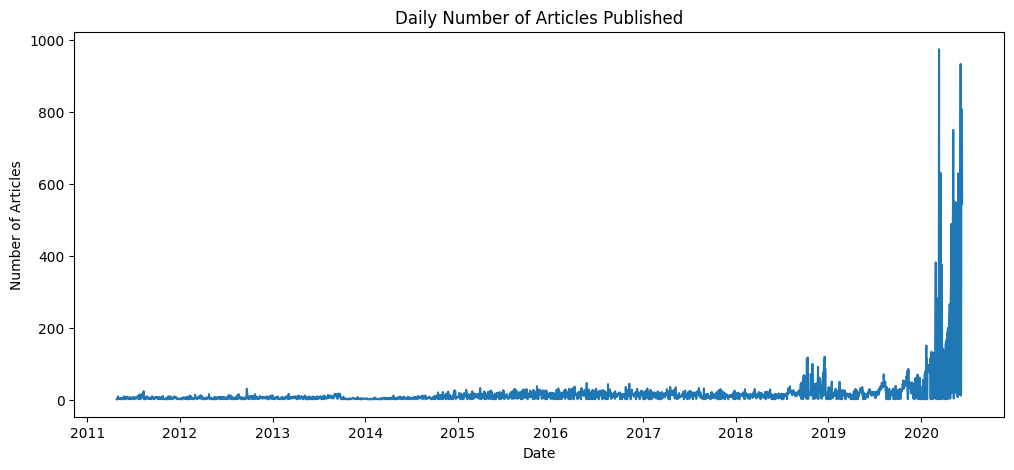

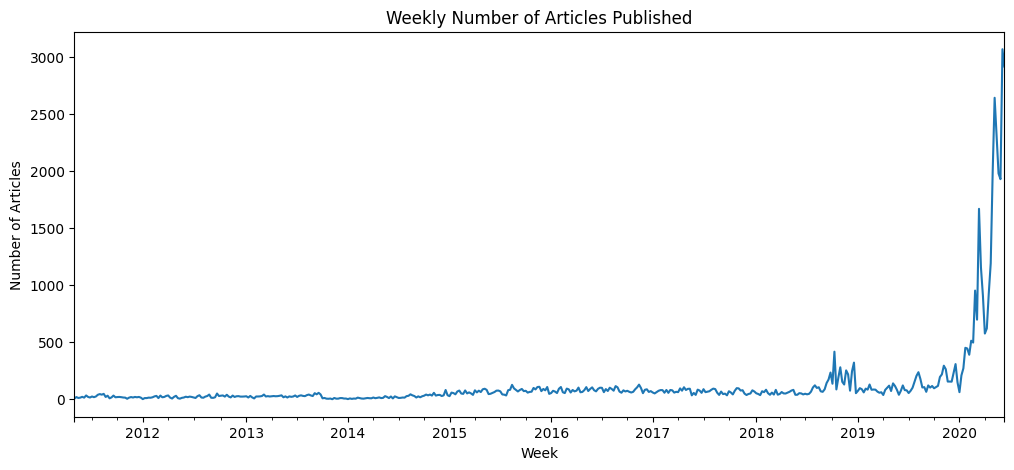

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' to datetime
df['publication_date'] = pd.to_datetime(df['date'])

# Daily counts
daily_counts = df.groupby(df['publication_date'].dt.date).size()

plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Daily Number of Articles Published")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

# Weekly counts (smoother trend)
weekly_counts = df.set_index('publication_date').resample('W').size()
plt.figure(figsize=(12,5))
weekly_counts.plot()
plt.title("Weekly Number of Articles Published")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.show()



Observation

- From 2012 to 2019, the news volume trend was smooth and steady.

- Starting late 2019, the article count began increasing.

- By 2020, there’s a sharp rise in the number of articles published.

Major contributors to the 2020 spike:

- Lisa Levin and Benzinga Newsdesk published significantly more articles starting late 2019–2020.

- They were the main drivers of the sharp increase in news volume.

C:\Users\bezis\AppData\Local\Temp\ipykernel_7796\44071390.py:17: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_counts = top_df.groupby('publisher').resample('W').size().unstack(level=0)


<Figure size 1400x700 with 0 Axes>

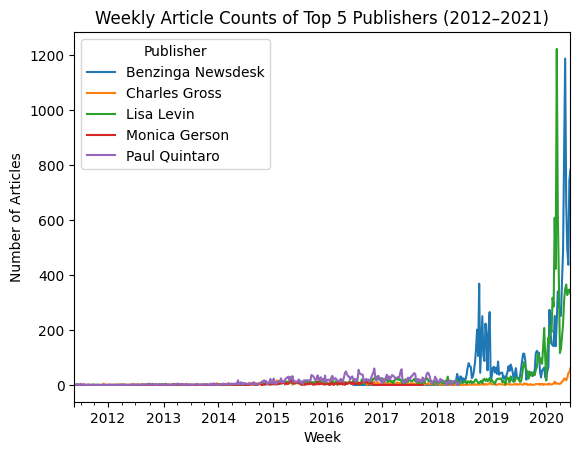

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Top 5 publishers
top_publishers = df['publisher'].value_counts().head(5).index.tolist()

# Convert 'date' to datetime if not done already
df['publication_date'] = pd.to_datetime(df['date'])

# Filter data for top publishers
top_df = df[df['publisher'].isin(top_publishers)]

# Set index for resampling
top_df.set_index('publication_date', inplace=True)

# Resample weekly and count articles per publisher
weekly_counts = top_df.groupby('publisher').resample('W').size().unstack(level=0)

# Plot
plt.figure(figsize=(14,7))
weekly_counts.plot()
plt.title("Weekly Article Counts of Top 5 Publishers (2012–2021)")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.legend(title="Publisher")
plt.show()


# Text Analysis / Topic Modeling (Keywords & Events)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize headlines
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(df['headline'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

keyword_freq = dict(zip(keywords, counts))
sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)


[('vs', np.int64(162099)),
 ('stocks', np.int64(161776)),
 ('est', np.int64(140604)),
 ('eps', np.int64(128897)),
 ('market', np.int64(120558)),
 ('shares', np.int64(114313)),
 ('reports', np.int64(108710)),
 ('update', np.int64(91723)),
 ('earnings', np.int64(87399)),
 ('sales', np.int64(79645)),
 ('benzinga', np.int64(74516)),
 ('pt', np.int64(73068)),
 ('week', np.int64(69572)),
 ('announces', np.int64(66591)),
 ('price', np.int64(64407)),
 ('buy', np.int64(64371)),
 ('mid', np.int64(62263)),
 ('downgrades', np.int64(61959)),
 ('trading', np.int64(61182)),
 ('raises', np.int64(57802)),
 ('52', np.int64(56972)),
 ('upgrades', np.int64(56811)),
 ('target', np.int64(54714)),
 ('maintains', np.int64(52961)),
 ('higher', np.int64(48286)),
 ('new', np.int64(48228)),
 ('00', np.int64(47468)),
 ('day', np.int64(46141)),
 ('session', np.int64(45349)),
 ('says', np.int64(43133)),
 ('moving', np.int64(42289)),
 ('10', np.int64(40630)),
 ('q4', np.int64(40571)),
 ('stock', np.int64(39760)),
 ('

Insights

- The dataset is heavily financial-focused, mainly covering stocks, earnings, and analyst updates.

- A lot of the content revolves around actionable events (upgrades, downgrades, price targets).

- This aligns with the earlier observation that Lisa Levin and Benzinga Newsdesk drove the 2020 surge, likely due to frequent reporting on earnings and market-moving events.